In [ ]:
'''
Agenda -

  - Two Way Anova
  - KS Test
  - A/B Testing
  - Parametric v/s Non Parametric Tests
'''

In [ ]:
import numpy as np
import pandas as pd

# 2 WAY ANOVA

In [ ]:
'''
Data Scientist at a beverage company.
Company wants to analyse the influence of two different independent factors on the "Sales" of the drink.
  - Location (North, South, East, West)
  - Flavour (Lemon, Cola, Orange)

2 independent variables -> Location and Flavour
1 dependent variable -> Sales

Main Effects - Effect of each independent variable on sales individually.
Interaction Effects - Effect of the correlation between flavour and location and then on sales.
'''

'\nData Scientist at a beverage company. \nCompany wants to analyse the influence of two different independent factors on the "Sales" of the drink.\n  - Location (North, South, East, West)\n  - Flavour (Lemon, Cola, Orange)\n\n2 independent variables -> Location and Flavour\n1 dependent variable -> Sales\n\nMain Effects - Effect of each independent variable on sales individually.\nInteraction Effects - Effect of the correlation between flavour and location and then on sales.\n'

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
!gdown 1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0

Downloading...
From: https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
To: /content/two_way_anova.csv
100% 1.54k/1.54k [00:00<00:00, 5.49MB/s]


In [ ]:
df = pd.read_csv("/content/two_way_anova.csv")

In [ ]:
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


In [ ]:
df["Flavour"].unique()

array(['Orange', 'Lemon', 'Cola'], dtype=object)

In [ ]:
df["Location"].unique()

array(['West', 'East', 'North', 'South'], dtype=object)

### STEP 1

1. Main Effects
  1. H0
    - Flavour - No significant difference in sales between 3 flavours.
    - Location - No significant difference in sales between 4 locations.
  2. Ha
    - Flavour - There is a significant difference in sales in atleast 2 flavours.
    - Location - There is a significant difference in sales in atleast 2 locations.

2. Alternate Effects
  1. H0 - There is no interaction effect between the choice of flavour and location on sales.
  2. Ha - There is significant interaction effect between the choice of flavour and location on sales.

### STEP 2

Distribution -> **GAUSSIAN**

In [ ]:
# STEP 3 -> Perform 2 Way ANOVA

# Use ols() to fit a model on the dataframe -> linear model
# ols("dependent_variable ~ independent_variable_1 * independent_variable_2", data = df).fit()
test = ols("Sales ~ Flavour * Location", data = df).fit()

# Creation of ANOVA table
# type = 2 helps perform 2 Way Anova
anova_table = sm.stats.anova_lm(test, typ = 2)

In [ ]:
print(anova_table)

                         sum_sq    df         F    PR(>F)
Flavour             6919.558981   2.0  1.968465  0.145773
Location            2059.273884   3.0  0.390546  0.760092
Flavour:Location   11802.257765   6.0  1.119163  0.357804
Residual          154669.016331  88.0       NaN       NaN


In [ ]:
# df -> degrees of freedom
# F -> F Ratio
# PR(>F) -> P Value

# KS TEST

In [ ]:
'''
Data Scientist in a pharma company.
Need to evaluate the effectiveness of two different medicines M1 and M2. Comparison.

In case of a Z Test -
  1. Population needs to be normally distributed
  2. We need info about population mean, std dev etc.

KS Test -
  1. Distribution Free -> Only compares similarity between the two given samples
  2. Compares the overall distribution and not just the means.

KS Statistic -> Signifies the similarity between two distributions. Will be close to zero in case they are similar.
'''

'\nData Scientist in a pharma company.\nNeed to evaluate the effectiveness of two different medicines M1 and M2. Comparison.\n\nIn case of a Z Test - \n  1. Population needs to be normally distributed\n  2. We need info about population mean, std dev etc.\n\nKS Test -\n  1. Distribution Free -> Only compares similarity between the two given samples\n  2. Compares the overall distribution and not just the means.\n\nKS Statistic -> Signifies the similarity between two distributions. Will be close to zero in case they are similar.\n'

In [ ]:
# H0: Both distributions are the same
# Ha: Distribution of M1 is significantly different from that of M2

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

In [ ]:
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]

In [ ]:
data_m1 = np.array(r1)
data_m2 = np.array(r2)

In [ ]:
n1 = len(data_m1)
n2 = len(data_m2)

In [ ]:
n1, n2

(100, 120)

In [ ]:
statistic, p_value = stats.kstest(data_m1, data_m2)
print(f"KS Statistic - {statistic} \nP Value - {p_value}")

KS Statistic - 0.3233333333333333 
P Value - 1.516338798228849e-05


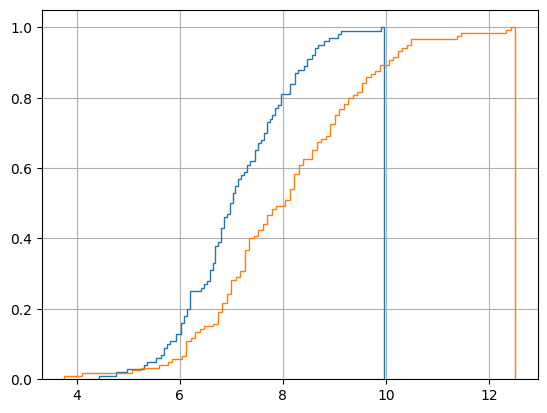

In [ ]:
plt.grid()

a = plt.hist(data_m1, bins = 100, cumulative = True, label = "CDF", density = True, histtype = "step")
b = plt.hist(data_m2, bins = 100, cumulative = True, label = "CDF", density = True, histtype = "step")

plt.show()

# A / B TESTING

In [ ]:
# H0: Mean watch time of users given 2 ads == Mean watch time of users given 1 ad
# Ha: Mean watch time of users given 2 ads != Mean watch time of users given 1 ad

In [ ]:
import seaborn as sns

In [ ]:
!gdown 1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1

Downloading...
From: https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
To: /content/ab_test_data.csv
100% 884k/884k [00:00<00:00, 106MB/s]


In [ ]:
ab_test_data = pd.read_csv("/content/ab_test_data.csv")

In [ ]:
ab_test_data.head()

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control


In [ ]:
ab_test_data.shape

(19960, 5)

In [ ]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "control"))

8459

In [ ]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "treatment"))

7975

In [ ]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "control"))

1514

In [ ]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "treatment"))

2012

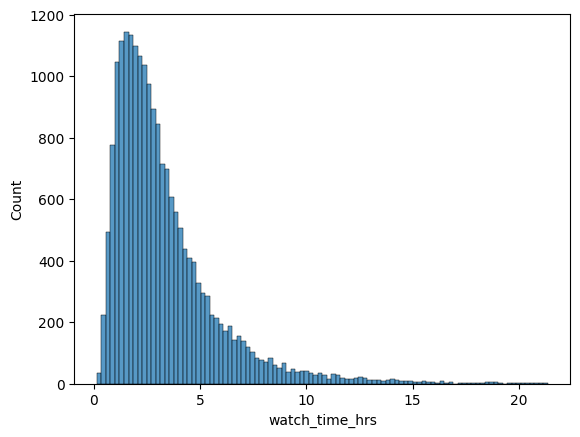

In [ ]:
sns.histplot(ab_test_data["watch_time_hrs"], bins = 100)
plt.show()

In [ ]:
ab_test_data.groupby("customer_segmnt")["watch_time_hrs"].mean()

customer_segmnt
control      3.609960
treatment    3.054294
Name: watch_time_hrs, dtype: float64

In [ ]:
ab_test_data_control = ab_test_data[ab_test_data["customer_segmnt"] == "control"]
ab_test_data_treatment = ab_test_data[ab_test_data["customer_segmnt"] == "treatment"]

In [ ]:
ab_test_data_control.shape

(9973, 5)

In [ ]:
ab_test_data_treatment.shape

(9987, 5)

In [ ]:
statistic, p_val = stats.ttest_ind(ab_test_data_control["watch_time_hrs"], ab_test_data_treatment["watch_time_hrs"])

In [ ]:
p_val

5.438408586231319e-57

In [ ]:
# Significance Level -> 0.01
# p value is much much lesser than the significance level

#### <font color='pink'>Parametric Hypothesis Testing:</font>

<font color='orange'>Assumptions:</font>

- Parametric tests make specific assumptions about the population distribution from which the data is drawn.
- Common assumptions include normality (data follows a normal distribution) and variance is constant across groups or conditions.
- Parametric tests are typically used when the data reasonably follows the assumed distribution and other assumptions are met.
- Parametric tests tend to be more powerful (i.e., better at detecting true effects) than non-parametric tests when the assumptions are met.
- This is especially true when the sample size is large.

#### <font color='pink'>Non-Parametric Hypothesis Testing:</font>

<font color='orange'>Assumptions:</dont>

- Non-parametric tests make fewer or no assumptions about the population distribution.
- They are distribution-free or rely on fewer assumptions, such as independence of observations.
- Non-parametric tests are useful when the assumptions for parametric tests are violated.
- They are also suitable for data types that don't fit well with parametric assumptions, such as ordinal or skewed data.
- Non-parametric tests are generally less powerful than parametric tests when data conforms to parametric assumptions.
- However, they can be more robust and appropriate when dealing with non-normally distributed data.

Let's see for each test we have learned till now, indicating whether it is parametric or non-parametric and the reasons why:

<font color='pink'>**One Sample Z-Test:**</font>
- Type: Parametric
- Reason: Assumes a known population standard deviation and a normally distributed population.

<font color='pink'>**Two Sample Z-Test:**</font>
- Type: Parametric
- Reason: Similar to the one-sample Z-test, it assumes known population standard deviations and normally distributed populations.

<font color='pink'>**One Sample T-Test:**</font>
- Type: Parametric
- Reason: Assumes a normally distributed population but does not require knowledge of the population standard deviation.

<font color='pink'>**Two Sample Independent T-Test:**</font>
- Type: Parametric
- Reason: Assumes normally distributed populations and equal variances between the two groups.

<font color='pink'>**Paired T-Test:**</font>
- Type: Parametric
- Reason: Assumes normally distributed population differences.

<font color='pink'>**One Sample Z-Test Proportion:**</font>
- Type: Parametric
- Reason: Assumes a known population proportion and sufficiently large sample sizes.

<font color='pink'>**Two Sample Z-Test Proportion:**</font>
- Type: Parametric
- Reason: Similar to the one-sample proportion test, it assumes known population proportions and sufficiently large sample sizes.

<font color='pink'>**Chi-Square Test:**</font>
- Type: Non-parametric
- Reason: Tests the association between categorical variables and doesn't make assumptions about the population distribution.

<font color='pink'>**One Way ANOVA:**</font>
- Type: Parametric
- Reason: Assumes normally distributed populations and equal variances among multiple groups.

<font color='pink'>**Kruskal-Wallis Test:**</font>
- Type: Non-parametric
- Reason: A non-parametric alternative to one-way ANOVA, used when the ANOVA assumptions are violated.

<font color='pink'>**Shapiro-Wilk Test:**</font>
- Type: Parametric (test for normality)
- Reason: Used to check the normality of data. If p-value is low, data may not be normally distributed.

<font color='pink'>**Levene's Test:**</font>
- Type: Parametric (test for variance)
- Reason: Used to check homogeneity of variances. If p-value is low, variances may not be equal.

<font color='pink'>**Two-Way ANOVA:**</font>
- Type: Parametric
- Reason: Extends one-way ANOVA to study the effects of two independent variables on a dependent variable.

<font color='pink'>**KS-Test (Kolmogorov-Smirnov Test):**</font>
- Type: Non-parametric
- Reason: Used to compare the distribution of two samples, making no assumptions about their population distributions.

<font color='pink'>**A/B Testing:**</font>
- Type: Typically parametric, but can be non-parametric
- Reason: This can involve various tests depending on the specific metric being tested and the underlying data distribution.

---

# Paired T Test

In [ ]:
!gdown 1X5XN_QwbYa18Ps3KlW_JVoK7G1C6iPVH

Downloading...
From: https://drive.google.com/uc?id=1X5XN_QwbYa18Ps3KlW_JVoK7G1C6iPVH
To: /content/problem_solving.csv
100% 1.28k/1.28k [00:00<00:00, 5.83MB/s]


In [ ]:
df_ps = pd.read_csv("/content/problem_solving.csv")

In [ ]:
df_ps.head()

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43


In [ ]:
from scipy.stats import ttest_rel

In [ ]:
# CASE 1
# H0: PS session has no effect on the test scores
# Ha: Average Score before PS != Average Score after PS

In [ ]:
stat, p_val = ttest_rel(df_ps["test_1"], df_ps["test_2"])

print(p_val)

1.795840353792313e-07


In [ ]:
# CASE 2
# H0: PS session has no effect on the test scores
# Ha: Average Score before PS < Average Score after PS

In [ ]:
stat, p_val = ttest_rel(df_ps["test_1"], df_ps["test_2"], alternative = "less")

print(p_val)

8.979201768961566e-08


In [ ]:
# CASE 3
# H0: PS session has no effect on the test scores
# Ha: Average Score before PS > Average Score after PS

In [ ]:
stat, p_val = ttest_rel(df_ps["test_1"], df_ps["test_2"], alternative = "greater")

print(p_val)

0.9999999102079823
